In [1]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None
import numpy as np
 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set('talk')
sns.set_style('white')

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Importing Data

In [2]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

# Train & Test

## Unique values

In [3]:
for col in train:
    print('{}: {} unique values'.format(col, train[col].nunique()))

country_code: 7 unique values
subject_line_length: 55 unique values
last_open_day: 520 unique values
last_login_day: 859 unique values
last_checkout_day: 912 unique values
open_count_last_10_days: 19 unique values
open_count_last_30_days: 46 unique values
open_count_last_60_days: 73 unique values
login_count_last_10_days: 159 unique values
login_count_last_30_days: 355 unique values
login_count_last_60_days: 598 unique values
checkout_count_last_10_days: 68 unique values
checkout_count_last_30_days: 134 unique values
checkout_count_last_60_days: 205 unique values
open_flag: 2 unique values
attr_1: 3 unique values
attr_2: 3 unique values
attr_3: 5 unique values
age: 99 unique values
domain: 11 unique values
last_open_login_checkout_sum: 2544 unique values
last_open_login_sum: 1410 unique values
last_open_checkout_sum: 1480 unique values
last_login_checkout_sum: 2043 unique values
open_count_last_diff_20: 33 unique values
open_count_last_diff_30: 43 unique values
open_count_last_diff_50:

In [4]:
def plot(train, test):
    train_temp = train.copy()
    test_temp = test.copy()
    train_temp['split'] = 'train'
    test_temp['split'] = 'test'
    combine = pd.concat([train_temp, test_temp], axis=0)
    for col in combine.columns:
        if col == 'split':
            continue
        plt.figure(figsize=(12,12))
        bins=100
        if combine[col].nunique() <= 10:
            data = combine.groupby('split')[col].value_counts(normalize=True).rename('percentage').reset_index().sort_values('split', ascending=False)
            sns.barplot(x=col, y='percentage', hue='split', data=data)
        else:
            train_weights = np.ones_like(train_temp[col]) / len(train_temp)
            test_weights = np.ones_like(test_temp[col]) / len(test_temp)
            sns.distplot(combine[combine['split'] == 'train'][col], hist_kws={'weights': train_weights}, bins=bins, label='train')
            sns.distplot(combine[combine['split'] == 'test'][col], hist_kws={'weights': test_weights}, bins=bins, label='test')
            plt.legend()

## Count and Distribution

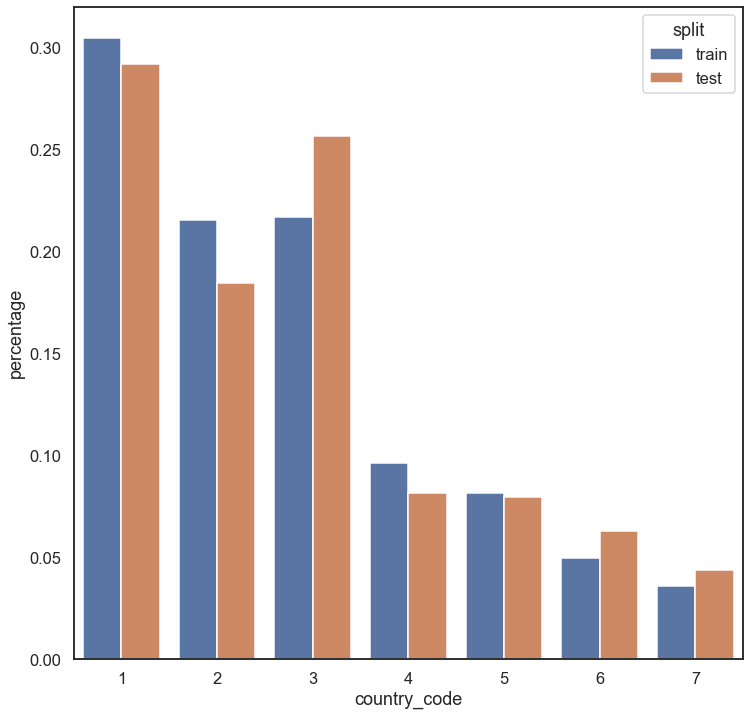

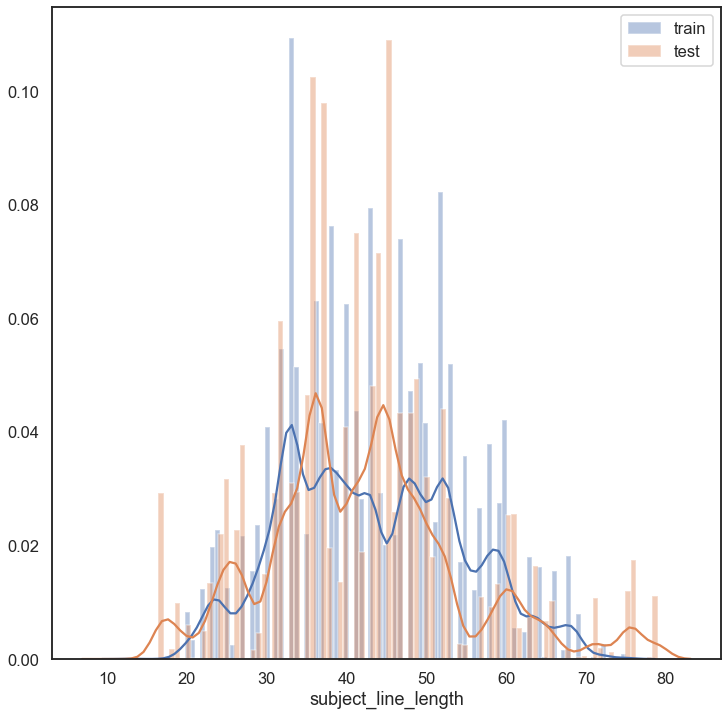

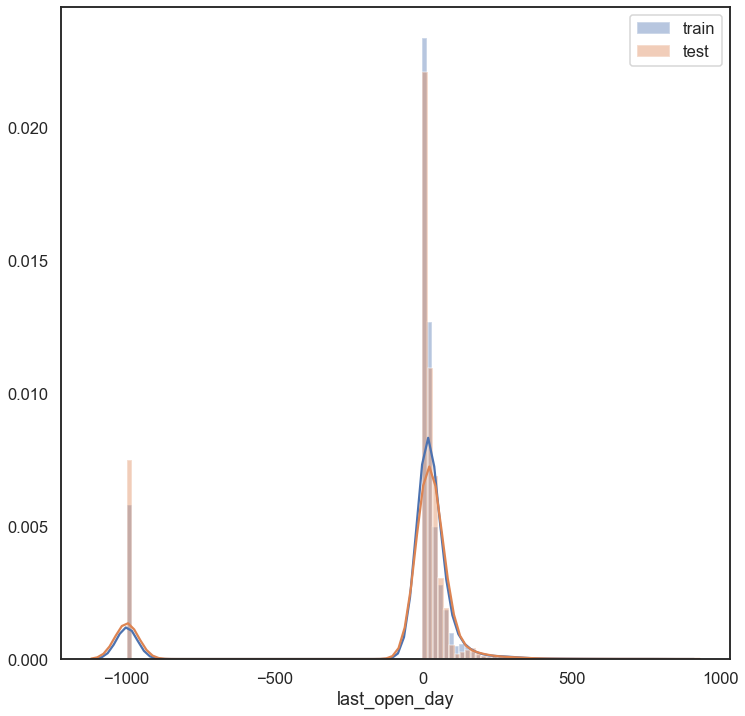

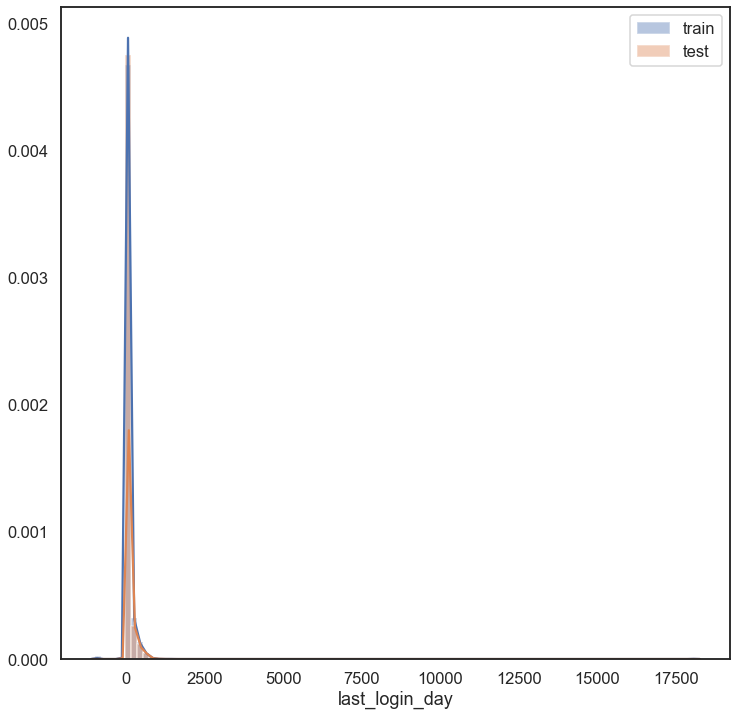

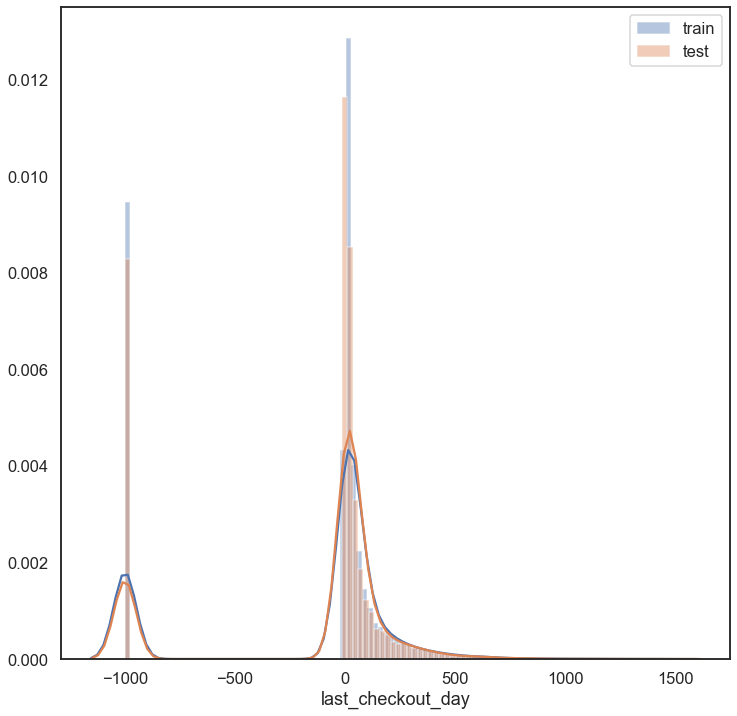

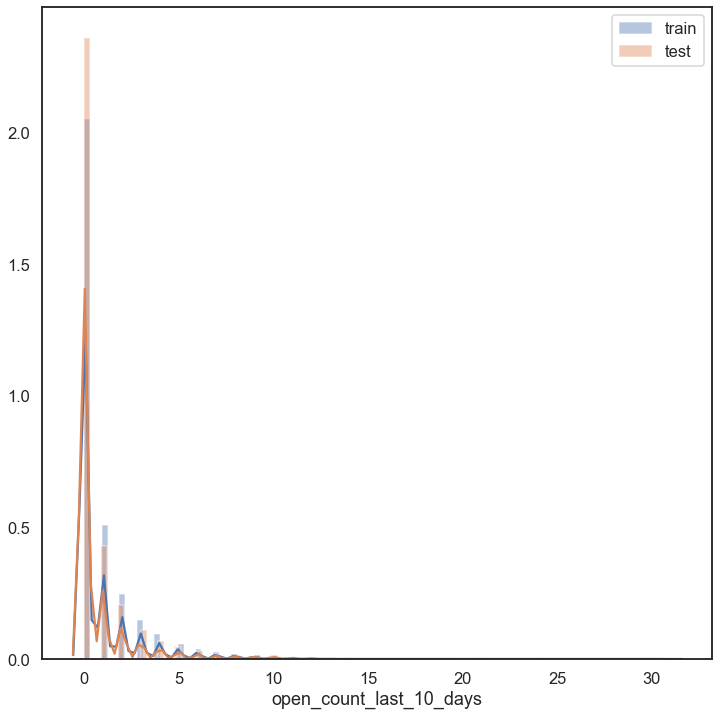

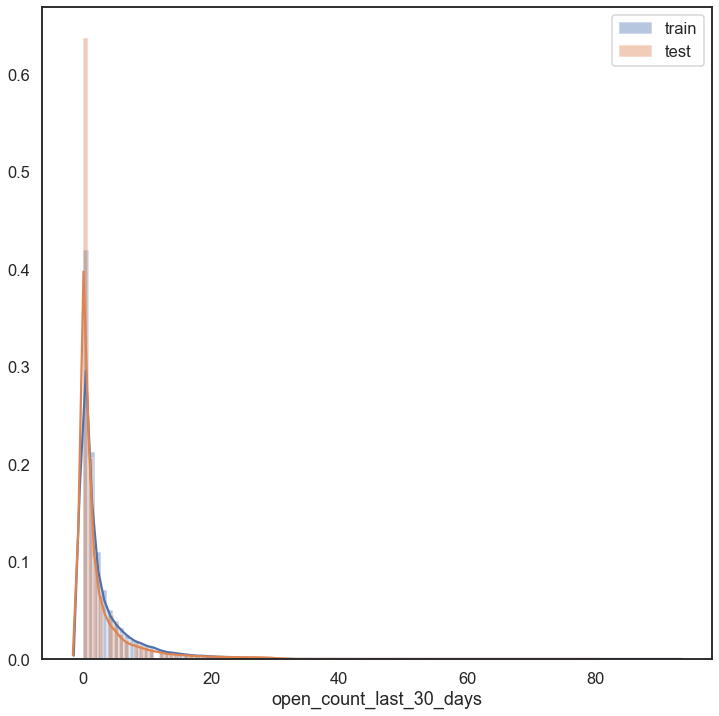

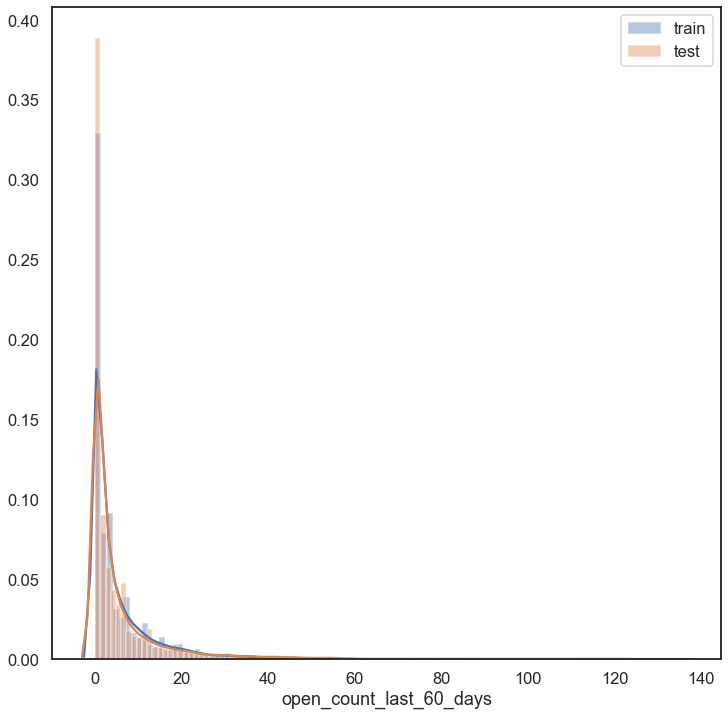

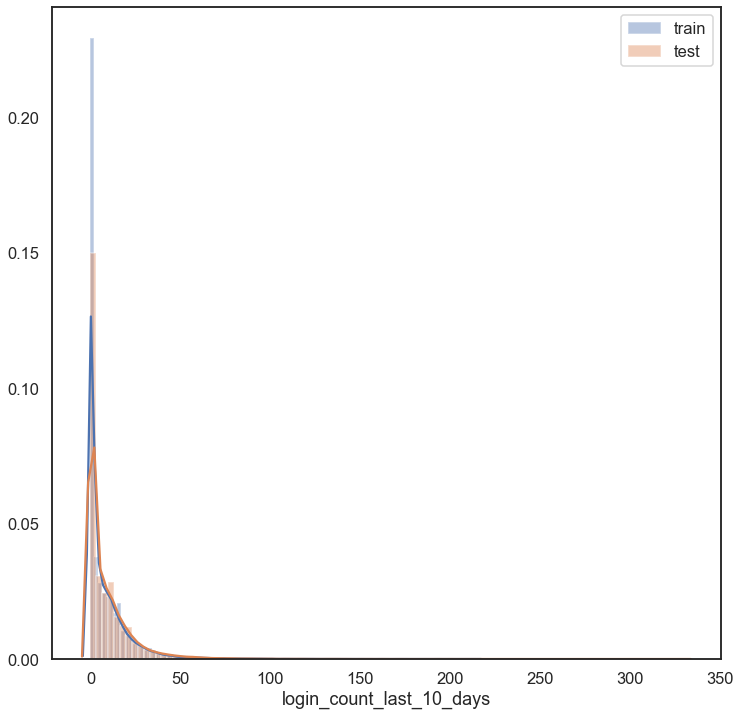

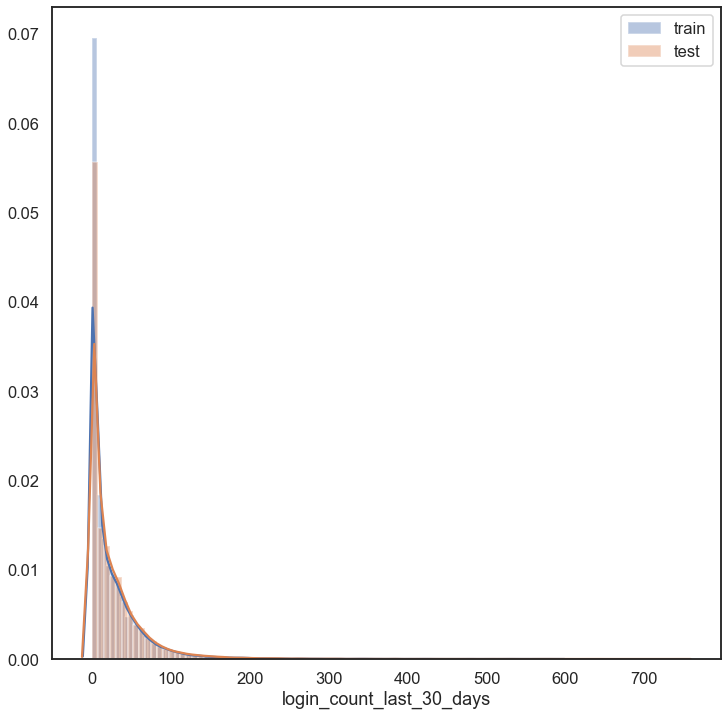

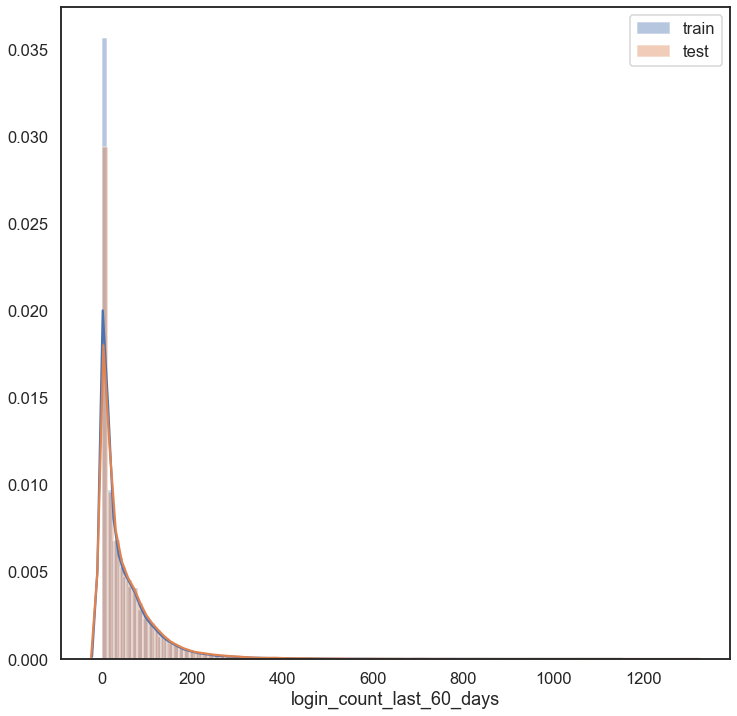

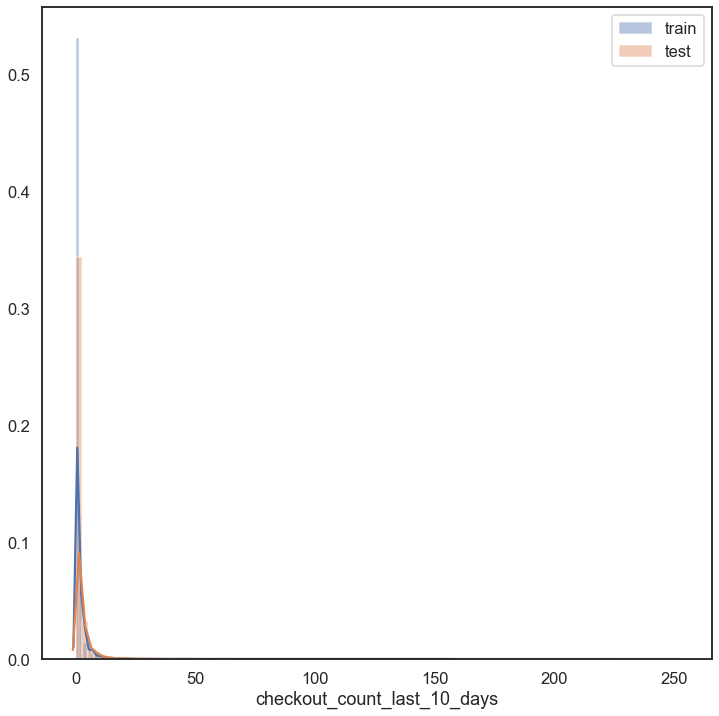

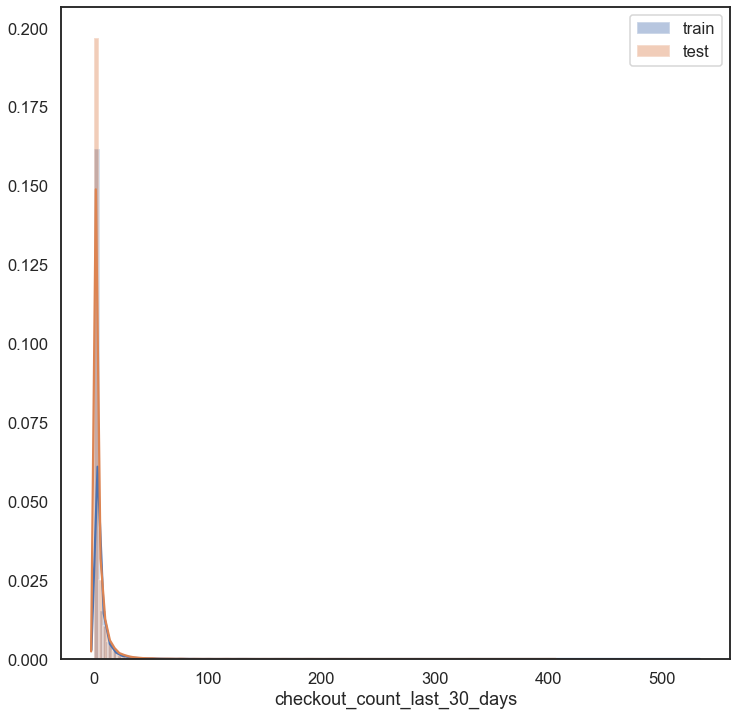

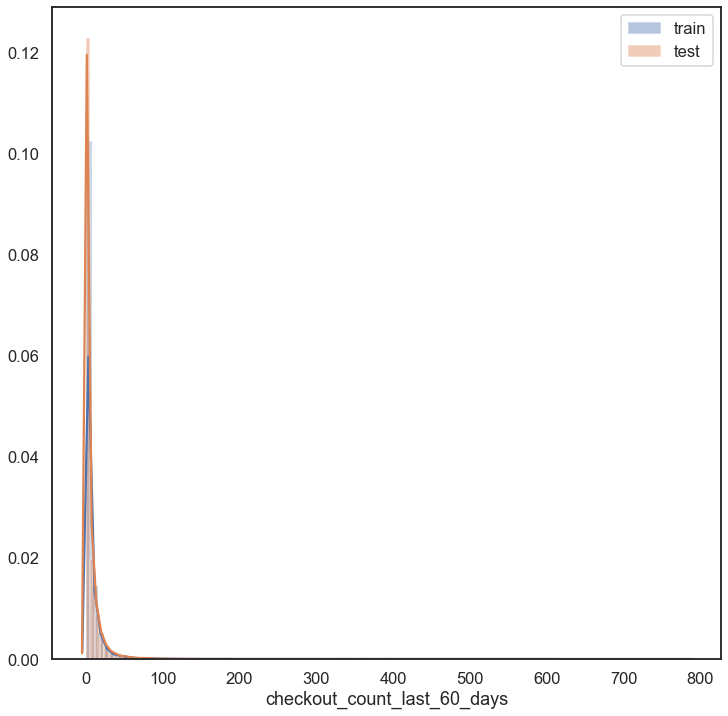

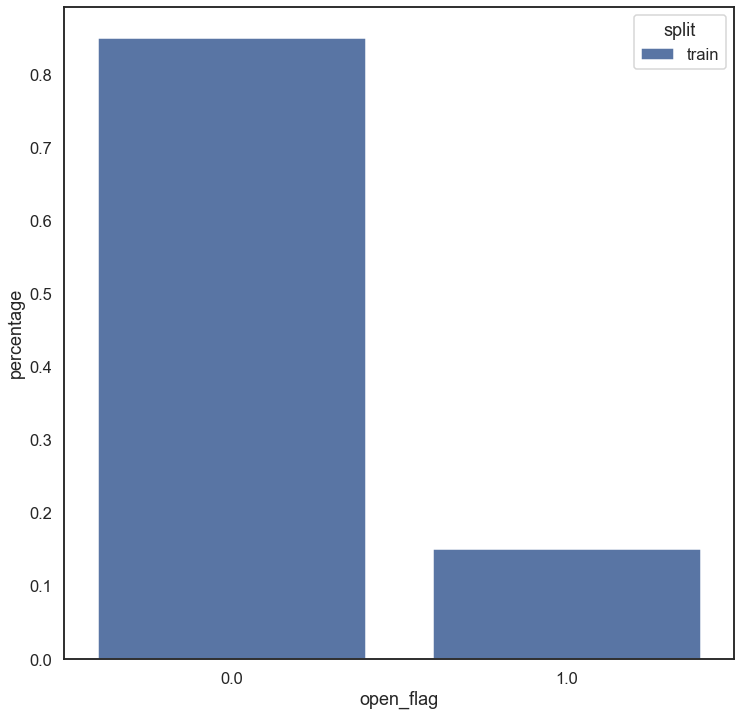

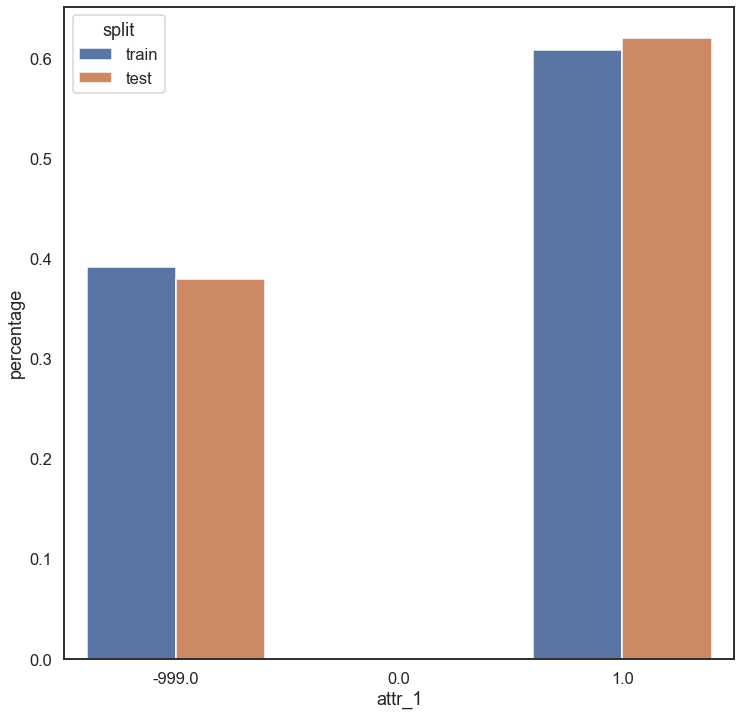

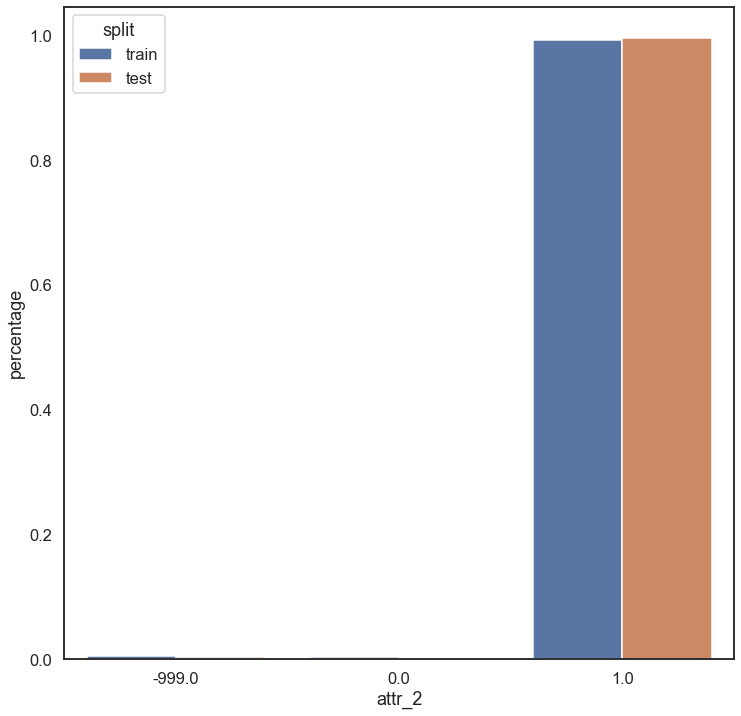

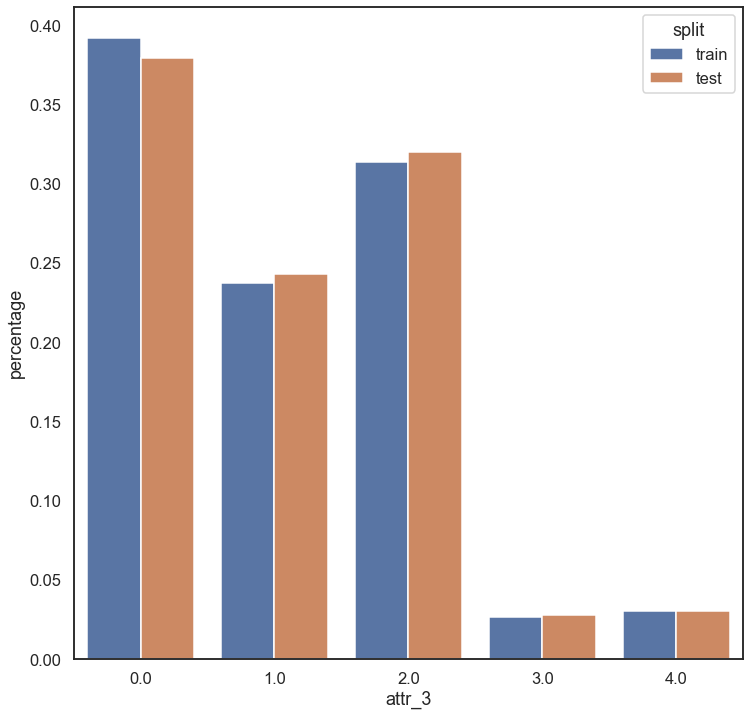

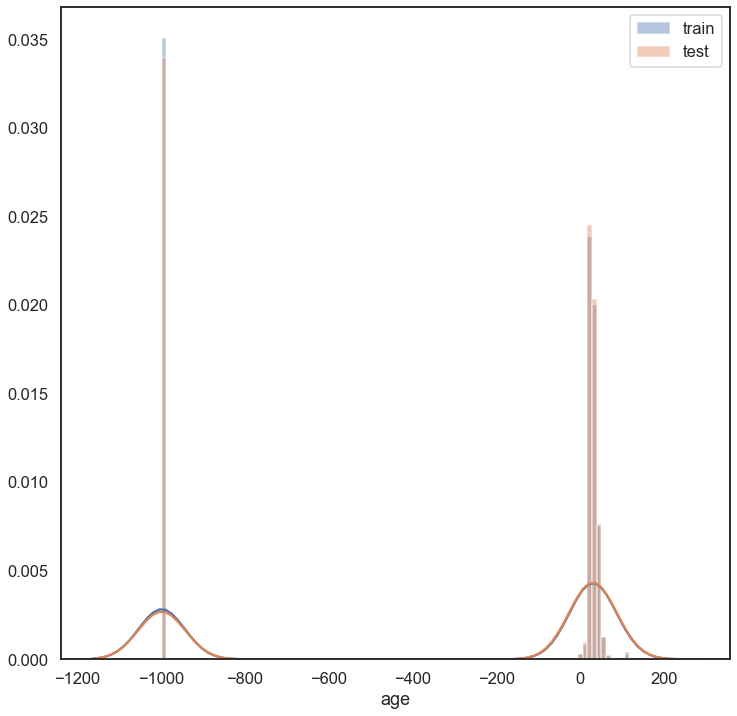

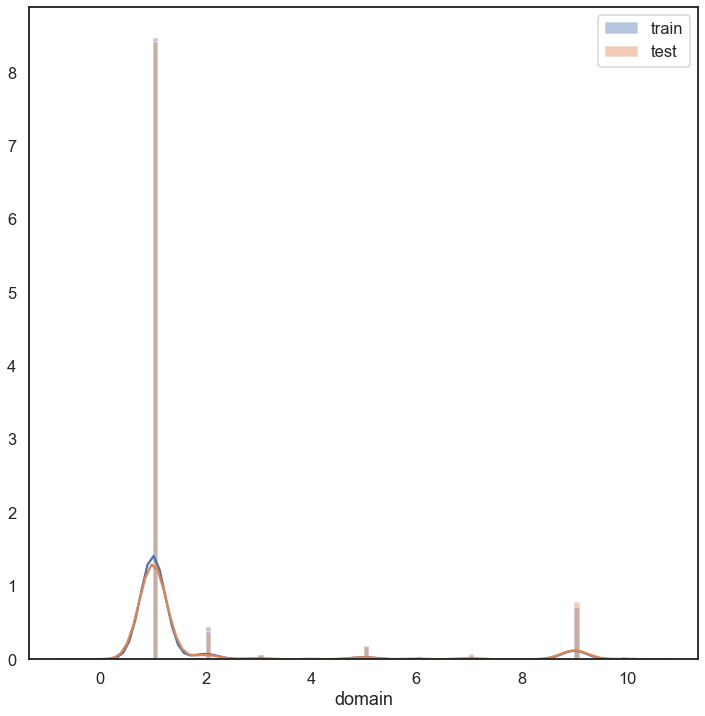

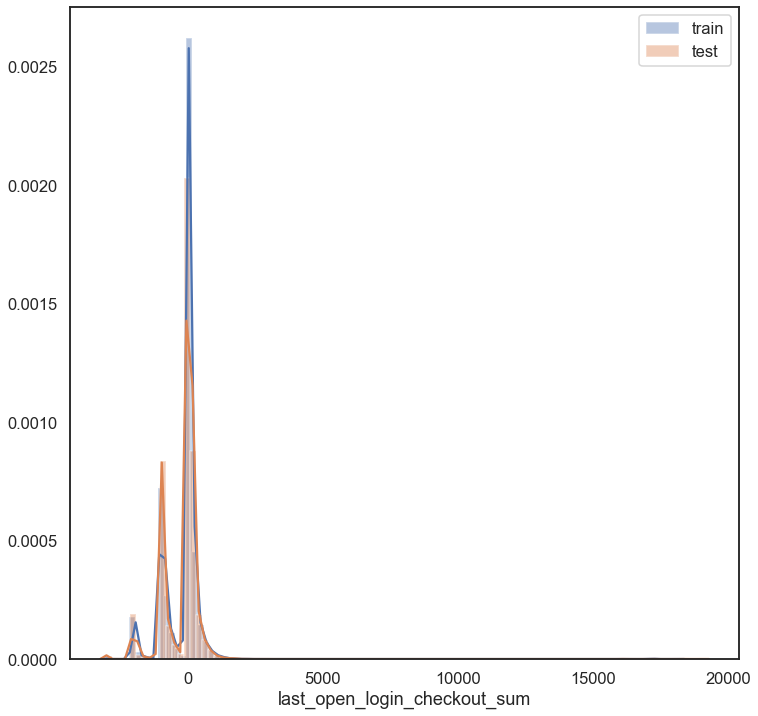

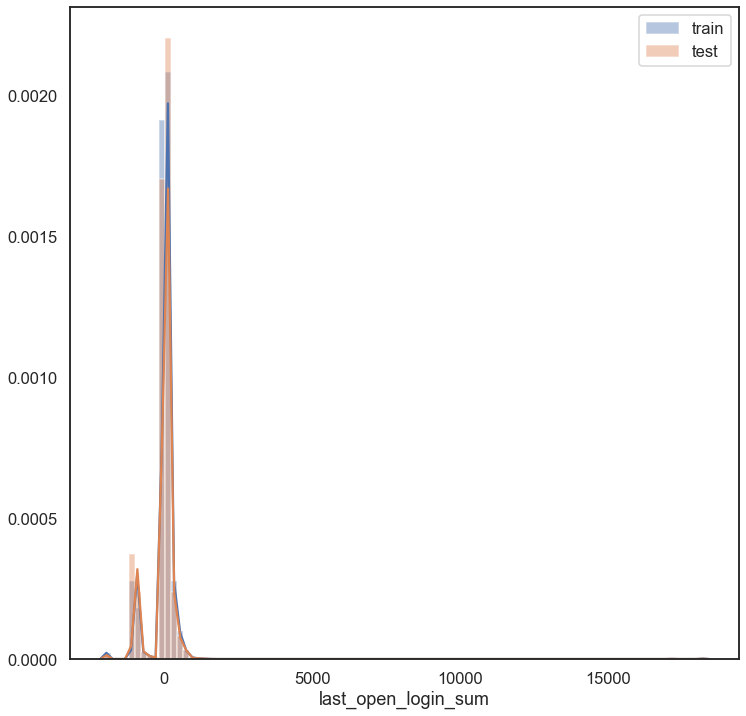

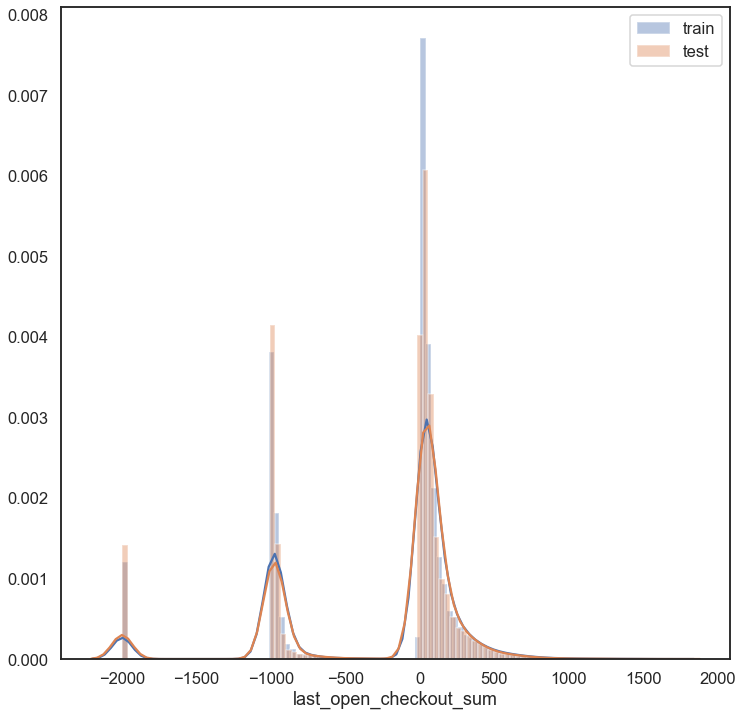

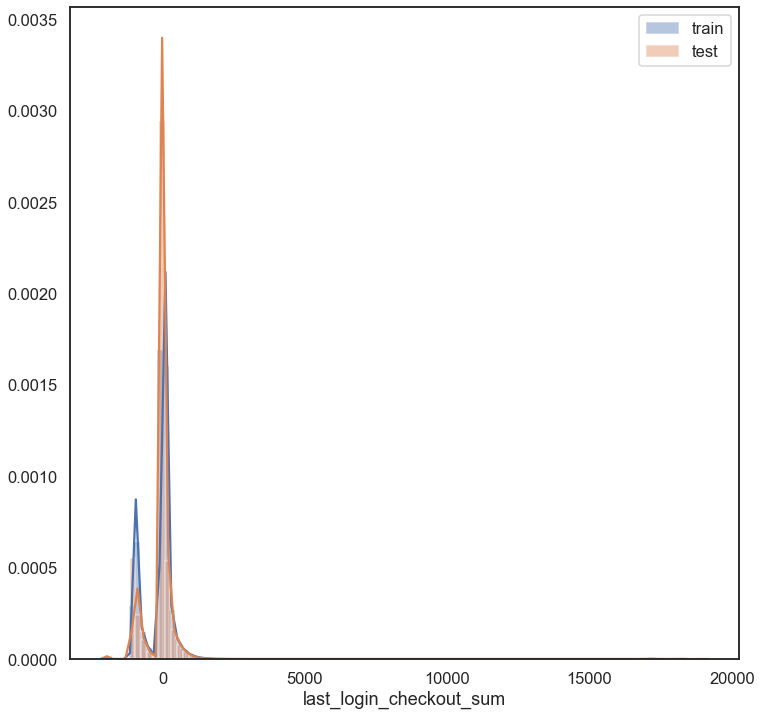

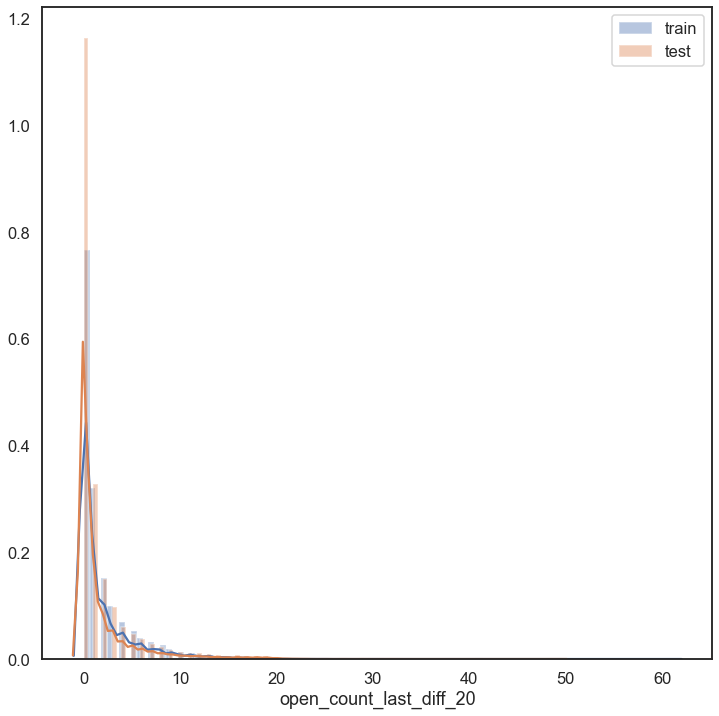

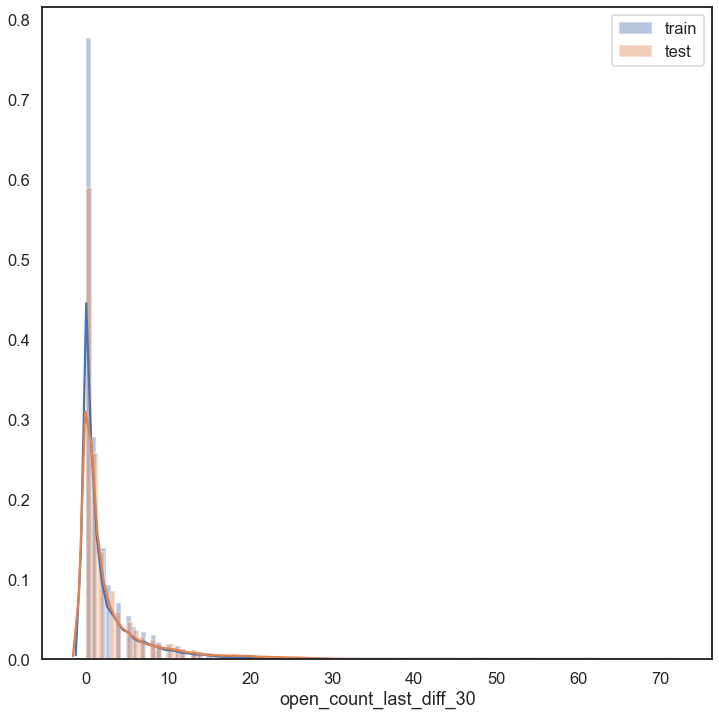

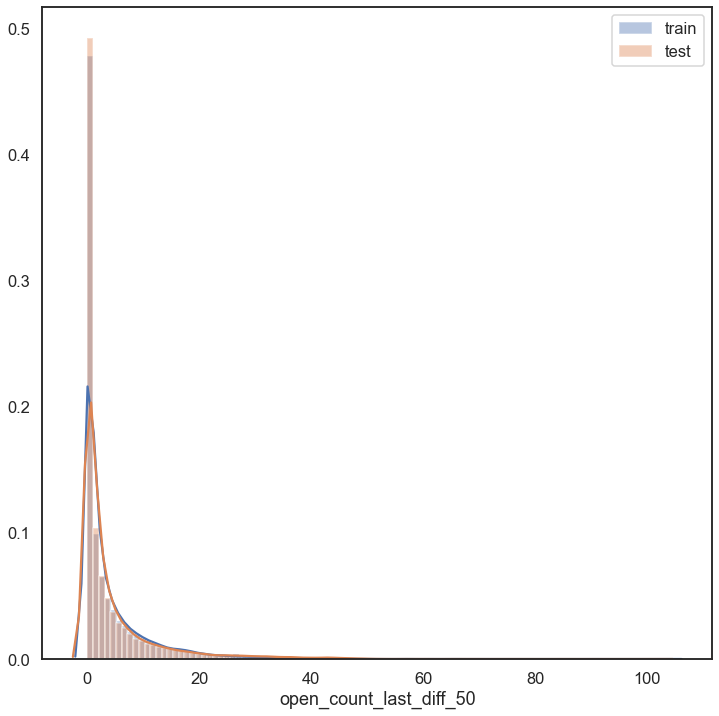

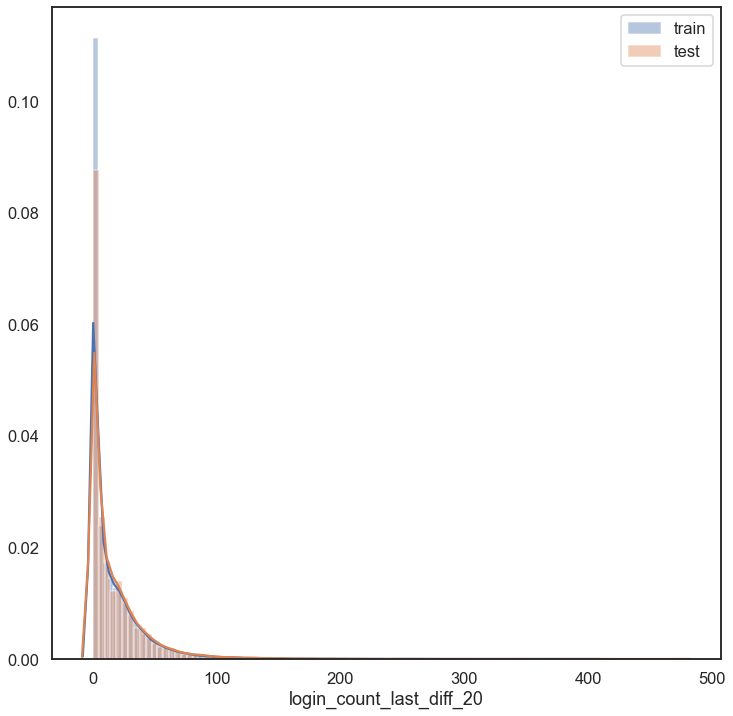

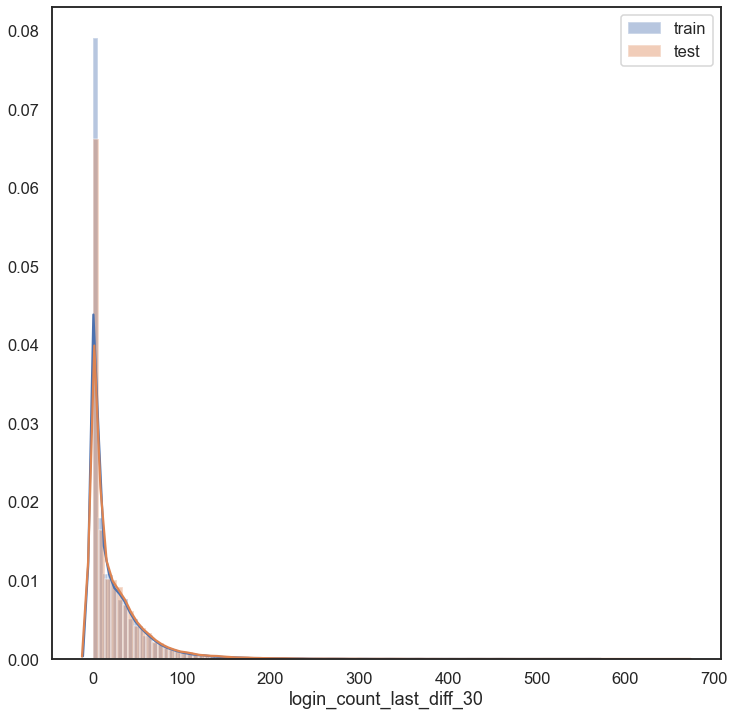

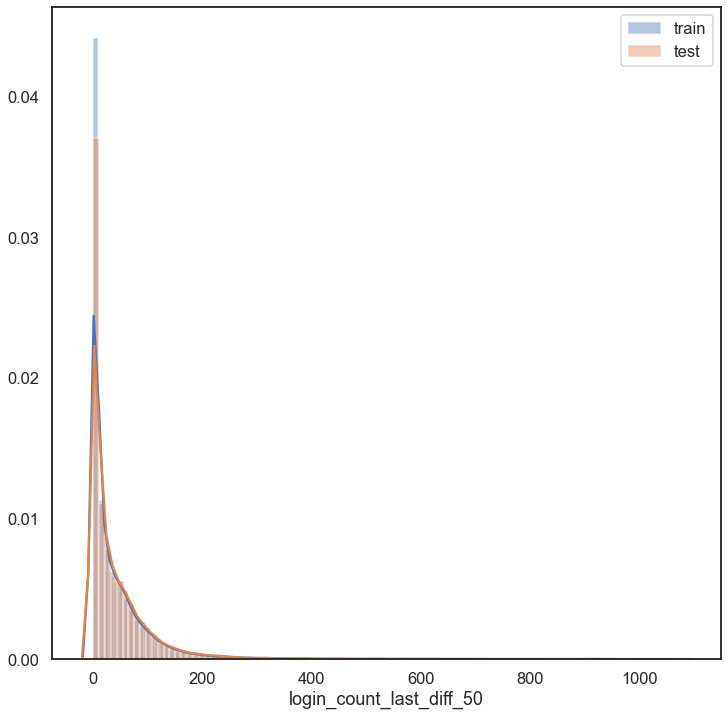

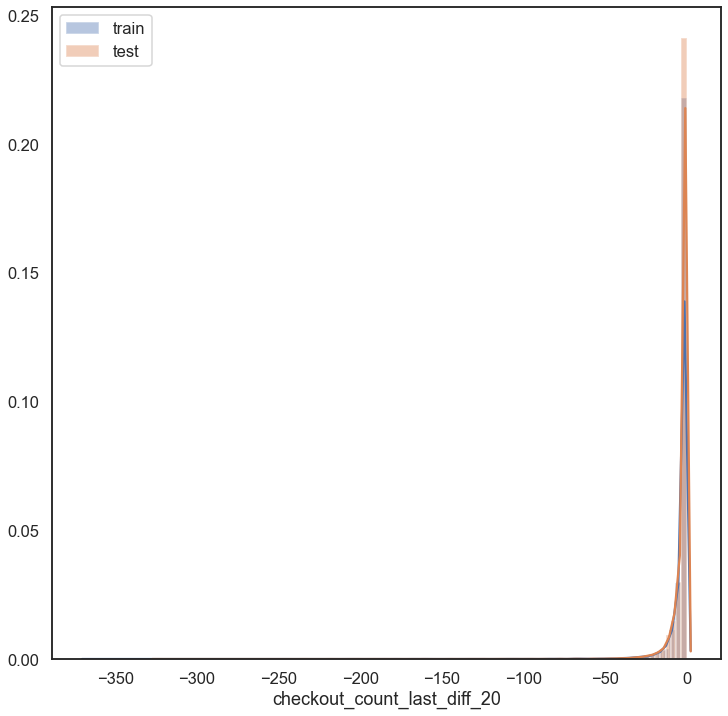

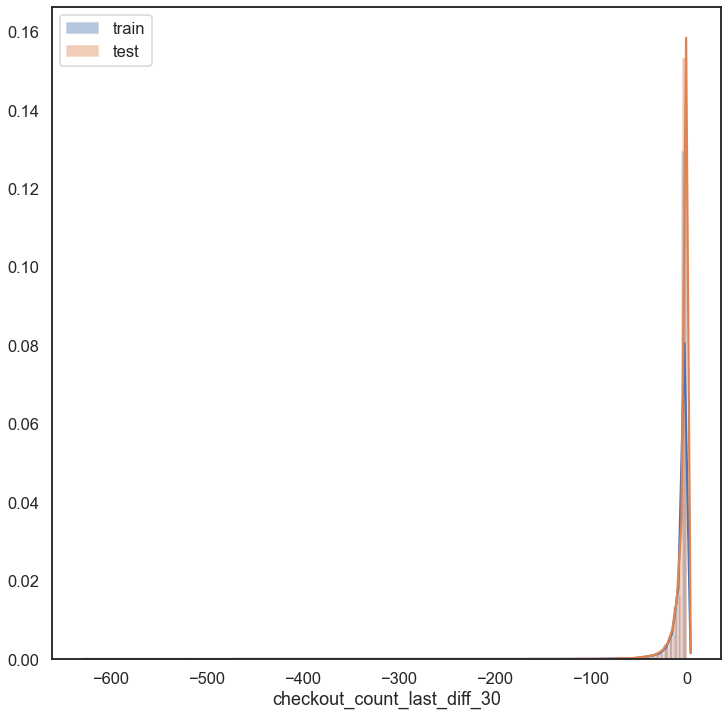

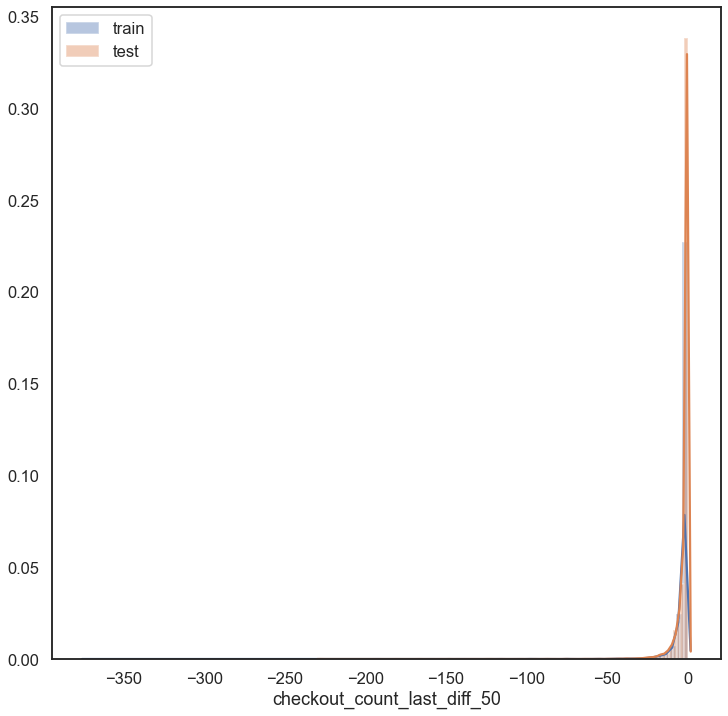

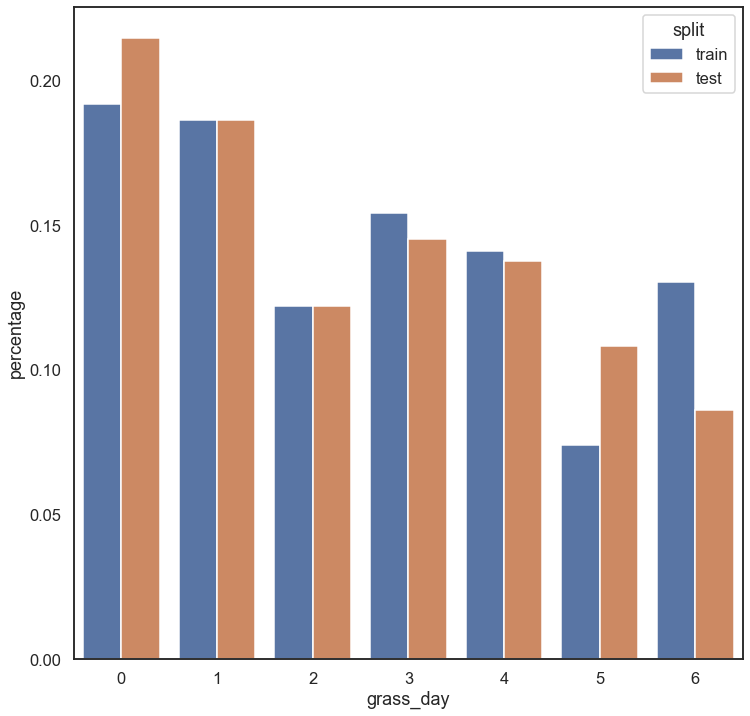

In [5]:
plot(train, test)

In [6]:
print('Percentage of positive: {}'.format(train['open_flag'].mean()))

Percentage of positive: 0.15001908639776054
